In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [35]:
# Function to fetch HTML content from a given URL
def get_html(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

# Function to extract reviews from a BeautifulSoup object
def extract_reviews(soup):
    reviews = []
    review_blocks = soup.find_all('div', {'class': '_27M-vq'})
    
    for block in review_blocks:
        review_element = block.find('p', {'class': '_2-N8zT'})
        review = review_element.text.strip()
        reviews.append(review)
    return reviews

def last_page(soup):
    page_block = soup.find_all('div', {'class': '_2MImiq _1Qnn1K'})
    page_block = page_block[0].find('span').text.strip()
    total_page = page_block.split('of')[1].strip()
    return int(total_page.replace(",", ""))


>>scraping pages : 
1,2,3,4,5,6
>>Scraping complete
['Slightly disappointed', 'Good choice', 'Very poor', 'Wonderful', 'Good', 'Moderate', 'Must buy!', 'Pretty good', 'Good choice', 'Worth the money', 'Really Nice', 'Useless product', 'Highly recommended', 'Mind-blowing purchase', 'Excellent', 'Decent product', 'Not good', 'Classy product', 'Unsatisfactory', 'Expected a better product', 'Not recommended at all', 'Worth the money', 'Brilliant', 'Terrific', 'Super!', 'Utterly Disappointed', 'Expected a better product', 'Terrific', "Don't waste your money", 'Super!', 'Great product', 'Bad quality', 'Great product', 'Great product', 'Fabulous!', 'Highly recommended', 'Wonderful', 'Terrific purchase', 'Terrific', 'Highly recommended', 'Great product', 'Good quality product', "Don't waste your money", 'Good choice', 'Good quality product', 'Moderate', 'Fabulous!', 'Just wow!', 'Mind-blowing purchase', 'Super!', 'Horrible', 'Bad quality', 'Must buy!', 'Very Good', 'Super!', 'Terrific purchase

In [ ]:

# URL of the page to scrape

site_url = input("Enter FLIPKART product URL: ")

separator="marketplace=FLIPKART"
url = site_url.split(separator,1)[0] + separator
url = url.replace('/p/', '/product-reviews/')

reviews = []
page = 1
soup = get_html(url)
page_limit = last_page(soup)
scraped_pages = []

# Scraping pages
print(">>scraping pages : ")
while page <=  page_limit :
    page_url = url + "&page=" + str(page)
    scraped_pages.append(str(page))
    print(",".join(scraped_pages), end='\r')
    soup = get_html(page_url)
    page_reviews = extract_reviews(soup)
    reviews.extend(page_reviews)
    page += 1

print(",".join(scraped_pages))
print(">>scraping complete")
print(reviews)

In [36]:
# Split reviews into sentences
string_value = ".".join(map(str, reviews))
separated_data= re.split('[,.!]', string_value)
separated_data = [x.strip() for x in separated_data if x.strip()]

# Remove emojis from the data
emoji_free_data = []


def replace_emoji_space(string):
    emoji_pattern = re.compile("["
                            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "\U0001F300-\U0001F5FF"  # symbols & pictographs
                            "\U0001F600-\U0001F64F"  # emoticons
                            "\U0001F680-\U0001F6FF"  # transport & map symbols
                            "\U0001F700-\U0001F77F"  # alchemical symbols
                            "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                            "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                            "\U0001FA00-\U0001FA6F"  # Chess Symbols
                            "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                            "\U00002702-\U000027B0"  # Dingbats
                            "\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', str(string))
for i in separated_data:
    emoji_free_data.append(replace_emoji_space(i))

print(emoji_free_data)

['Slightly disappointed', 'Good choice', 'Very poor', 'Wonderful', 'Good', 'Moderate', 'Must buy', 'Pretty good', 'Good choice', 'Worth the money', 'Really Nice', 'Useless product', 'Highly recommended', 'Mind-blowing purchase', 'Excellent', 'Decent product', 'Not good', 'Classy product', 'Unsatisfactory', 'Expected a better product', 'Not recommended at all', 'Worth the money', 'Brilliant', 'Terrific', 'Super', 'Utterly Disappointed', 'Expected a better product', 'Terrific', "Don't waste your money", 'Super', 'Great product', 'Bad quality', 'Great product', 'Great product', 'Fabulous', 'Highly recommended', 'Wonderful', 'Terrific purchase', 'Terrific', 'Highly recommended', 'Great product', 'Good quality product', "Don't waste your money", 'Good choice', 'Good quality product', 'Moderate', 'Fabulous', 'Just wow', 'Mind-blowing purchase', 'Super', 'Horrible', 'Bad quality', 'Must buy', 'Very Good', 'Super', 'Terrific purchase']


In [37]:
# Create a DataFrame from the cleaned data
review_df = pd.DataFrame(emoji_free_data, columns=['Reviews'])
review_df.head()

# Fill empty strings with 'Average'
review_df = review_df.replace(r'^\s*$', "Average", regex=True)

# Convert to lowercase
review_df["Reviews"] = review_df["Reviews"].str.lower()
print(review_df.head())
print('DataFrame length: ' + str(len(review_df)))


                 Reviews
0  slightly disappointed
1            good choice
2              very poor
3              wonderful
4                   good
DataFrame length: 56


In [38]:
# Load positive and negative words from files
file1 = "positiveword.txt"
positive_words = []
with open(file1, 'r') as file:
    for line in file:
        positive_words.append(line.strip().split(","))
print(positive_words)

file2 = "negativeword.txt"
negative_words = []
with open(file2, 'r') as file:
    for line in file:
        negative_words.append(line.strip().split(","))
print(negative_words)

[['a+'], ['abound'], ['abounds'], ['abundance'], ['abundant'], ['accessable'], ['accessible'], ['acclaim'], ['acclaimed'], ['acclamation'], ['accolade'], ['accolades'], ['accommodative'], ['accomodative'], ['accomplish'], ['accomplished'], ['accomplishment'], ['accomplishments'], ['accurate'], ['accurately'], ['achievable'], ['achievement'], ['achievements'], ['achievible'], ['acumen'], ['adaptable'], ['adaptive'], ['adequate'], ['adjustable'], ['admirable'], ['admirably'], ['admiration'], ['admire'], ['admirer'], ['admiring'], ['admiringly'], ['adorable'], ['adore'], ['adored'], ['adorer'], ['adoring'], ['adoringly'], ['adroit'], ['adroitly'], ['adulate'], ['adulation'], ['adulatory'], ['advanced'], ['advantage'], ['advantageous'], ['advantageously'], ['advantages'], ['adventuresome'], ['adventurous'], ['advocate'], ['advocated'], ['advocates'], ['affability'], ['affable'], ['affably'], ['affectation'], ['affection'], ['affectionate'], ['affinity'], ['affirm'], ['affirmation'], ['affi

In [39]:
# Copy the DataFrame for processing
review_dff = review_df.copy()

# Flatten the lists of positive and negative words
neg_flat_list = [item for sublist in negative_words for item in sublist]
print(neg_flat_list)

pos_flat_list = [item for sublist in positive_words for item in sublist]
print(pos_flat_list)


['abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggressive', 'aggressiveness'

In [44]:
# Function to determine remarks (positive, negative, or average)
def determine_sentiment(review):
    review_words = set(review.lower().split())
    
    if any(word in review_words for word in pos_flat_list):
        return 'Positive'
    elif any(word in review_words for word in neg_flat_list):
        return 'Negative'
    else:
        return 'Average'

# Apply the determine_sentiment function to create the 'Remarks' column
review_dff['Sentiment'] = review_dff['Reviews'].apply(determine_sentiment)

print(review_dff.head(5))

                 Reviews Sentiment
0  slightly disappointed  Negative
1            good choice  Positive
2              very poor  Negative
3              wonderful  Positive
4                   good  Positive


In [41]:
# Count the occurrences of each Sentiment
sentiment_count = review_dataframe_copy['Sentiment'].value_counts()
print(sentiment_count)

Sentiment
Positive    701
Negative    119
Average      58
Name: count, dtype: int64


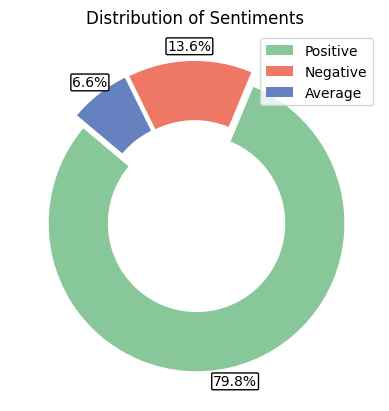

In [42]:
# Plot a pie chart to visualize the distribution of remarks
custom_colors = ['#88c79a', '#ef7765', '#6581c0']
explode = (0.05, 0.05, 0.05) 

plt.pie(sentiment_count, autopct='%1.1f%%', startangle=140, colors=custom_colors,
        wedgeprops=dict(width=0.4), textprops={'color': 'black', 'bbox': {'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.1'}},
        pctdistance=1.1, explode=explode)

plt.title('Distribution of Sentiments')
plt.legend(sentiment_count.index, loc='upper right')
plt.show()